# Find the Best of Two Markets to Advertise the Product 

I am working as a Data Analyst for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. 
Our company wants to promote our product and would like to invest some money in advertisement. 

The goal of this project is to find out the two best markets to advertise our product in.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_columns',200)

In [3]:
survey = pd.read_csv('../input/2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
dropcols = []

In [5]:
survey['MoneyForLearning'].describe()

count     16577.000000
mean        957.299753
std        5003.003169
min           0.000000
25%           0.000000
50%          10.000000
75%         200.000000
max      210000.000000
Name: MoneyForLearning, dtype: float64

In [6]:
%matplotlib inline 

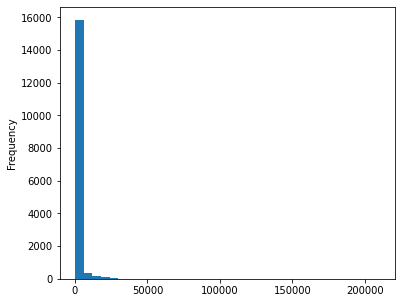

In [7]:
plt.figure(figsize=(6,5))
survey['MoneyForLearning'].plot.hist(bins=35)
plt.show()



In [8]:
survey.shape

(18175, 136)

In [9]:
survey['JobWherePref'].value_counts(dropna=False,normalize=True)

NaN                                   0.553343
in an office with other developers    0.223879
no preference                         0.136561
from home                             0.086217
Name: JobWherePref, dtype: float64

In [10]:
survey['JobRelocateYesNo'].value_counts(dropna=False,normalize=True)

NaN    0.642201
1.0    0.276094
0.0    0.081706
Name: JobRelocateYesNo, dtype: float64

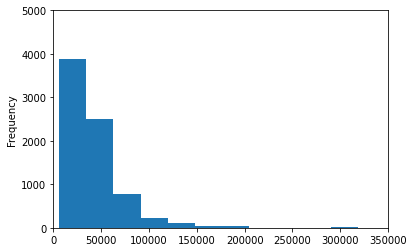

In [11]:
survey['Income'].plot.hist(bins=35)
plt.xlim(0,350000)
plt.ylim(0,5000)
plt.show()

In [12]:
survey.isnull().sum().sort_values()

Part1StartTime                       0
NetworkID                            0
Part1EndTime                         0
ID.x                                 0
IsSoftwareDev                      107
AttendedBootcamp                   466
MonthsProgramming                 1091
HoursLearning                     1461
MoneyForLearning                  1598
Part2StartTime                    2432
Part2EndTime                      2432
ID.y                              2432
Gender                            2721
CountryCitizen                    2793
HasHighSpdInternet                2795
SchoolDegree                      2807
Age                               2808
CityPopulation                    2821
LanguageAtHome                    2831
CountryLive                       2839
MaritalStatus                     2840
HasFinancialDependents            2846
IsEthnicMinority                  2882
HasDebt                           2884
HasServedInMilitary               2919
IsReceiveDisabilitiesBene

In [13]:
columns =survey.columns.tolist()
columns

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

* Inorder to advertise our product, we need to find markets where lot of new coders often view/visit, and what job roles they are mainly interested in, to capture the attention of huge audience. 

* Also, knowing who our competitors are, supply/demand, in the market for a given product, say web development, data science, etc, is imperative to the study. 

* Since, we are an e-learning company, majority of the revenue comes from selling the products. The more products we sell, the more revenue the company generates. Therefore, it would be very helpful to the study, to find out the income bracket of the customers, their willingness to spend money(also, how much?) to buy e-learning products to achieve their goals.

* Customers that live in cities generally have more access to the in person bootcamps. But city's traffic and other commitments might incline them towards e-learning. For people who work for wages in remote areas or for customers that are willing not to relocate, e-learning would be better option

* Also, knowing the education background of the customers is important to determine the structure or level of e-learning products like basic, intermediate, advanced etc. 

* E-learning products that offer practical experince or on-line ides that help customers to practice what they learnt online without having to buy expensive hardware would be preferred too. Just basic laptop, interent would suffice.

* Also, knowing the percentage of customers that are interested in learning courses online than inperson is important for our study 

* For advestising related data, we need to know the segment of customers that visit Youtube, listen to podcasts, vist e-learning sites like coursera, edx, pluralsight, etc., 
* To know more about customers, we need to know their job interests,money they are willing to spend, location they live in etc

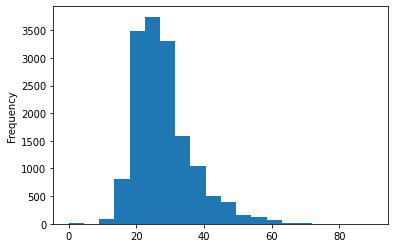

In [14]:
survey['Age'].plot.hist(bins=20)
plt.show()

In [15]:
# Below shows that majority of coders in the data fall between the age of 22 & 32 years 
survey['Age'].describe()

count    15367.000000
mean        27.691872
std          8.559239
min          0.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         90.000000
Name: Age, dtype: float64

In [16]:
# 65% of the customers live in cities with population more than 100k
survey['CityPopulation'].value_counts(dropna=False,normalize=True)

more than 1 million              0.359505
between 100,000 and 1 million    0.290289
less than 100,000                0.194993
NaN                              0.155213
Name: CityPopulation, dtype: float64

In [17]:
survey['Gender'].value_counts(dropna=False,normalize=True)

male           0.679175
female         0.161265
NaN            0.149711
genderqueer    0.003961
trans          0.003851
agender        0.002036
Name: Gender, dtype: float64

In [18]:
#Not much variance here. Also, data does not look valid or reasonable. 
survey['GenderOther'].value_counts(dropna=False,normalize=True)
dropcols.append('GenderOther')

In [19]:
survey['HasHighSpdInternet'].value_counts(dropna=False,normalize=True)

1.0    0.723356
NaN    0.153783
0.0    0.122861
Name: HasHighSpdInternet, dtype: float64

In [20]:
survey['JobPref'].value_counts(dropna=False,normalize=True).sort_values()

work for a government                   0.020193
work for a nonprofit                    0.045997
work for a multinational corporation    0.093535
work for a startup                      0.121045
freelance                               0.144209
start your own business                 0.152957
work for a medium-sized company         0.163906
NaN                                     0.258157
Name: JobPref, dtype: float64

In [21]:
df = pd.DataFrame(survey['JobRoleInterest'].value_counts(normalize=True)).sort_values(by ='JobRoleInterest',ascending=False).reset_index(drop=False)

In [22]:
df = df.rename({'index':'JobRoles'},axis=1)
df

,JobRoles,JobRoleInterest
0,Full-Stack Web Developer,0.117706
1,Front-End Web Developer,0.064359
2,Data Scientist,0.021739
3,Back-End Web Developer,0.020309
4,Mobile Developer,0.016733
...,...,...
3208,"Information Security, Data Engineer, Game Developer, Data Scientist, Full-Stack Web Developer, Business Analyst",0.000143
3209,"Back-End Web Developer, Product Manager, DevOps / SysAdmin, Full-Stack Web Developer, Data Scientist, Game Developer",0.000143
3210,"Front-End Web Developer, Data Engineer, Data Scientist, DevOps / SysAdmin",0.000143
3211,"Data Engineer, Mobile Developer, Full-Stack Web Developer, Game Developer",0.000143


In [23]:
df.head(10)

,JobRoles,JobRoleInterest
0,Full-Stack Web Developer,0.117706
1,Front-End Web Developer,0.064359
2,Data Scientist,0.021739
3,Back-End Web Developer,0.020309
4,Mobile Developer,0.016733
5,Game Developer,0.016304
6,Information Security,0.013158
7,"Full-Stack Web Developer, Front-End Web Developer",0.009153
8,"Front-End Web Developer, Full-Stack Web Developer",0.008009
9,Product Manager,0.007866


In [24]:
df.tail(10)

,JobRoles,JobRoleInterest
3203,"Full-Stack Web Developer, Data Scientist, Front-End Web Developer, User Experience Designer, Product Manager",0.000143
3204,"Back-End Web Developer, Front-End Web Developer, Data Engineer, Full-Stack Web Developer, Mobile Developer",0.000143
3205,"Front-End Web Developer, Mobile Developer, Game Developer, Data Scientist, Full-Stack Web Developer, Data Engineer",0.000143
3206,"Full-Stack Web Developer, DevOps / SysAdmin, Front-End Web Developer, Game Developer, Back-End Web Developer",0.000143
3207,"Data Scientist, Product Manager, Quality Assurance Engineer, Full-Stack Web Developer, Information Security, Back-End Web Developer, DevOps / SysAdmin, Mobile Developer, Data Engineer, ...",0.000143
3208,"Information Security, Data Engineer, Game Developer, Data Scientist, Full-Stack Web Developer, Business Analyst",0.000143
3209,"Back-End Web Developer, Product Manager, DevOps / SysAdmin, Full-Stack Web Developer, Data Scientist, Game Developer",0.000143
3210,"Front-End Web Developer, Data Engineer, Data Scientist, DevOps / SysAdmin",0.000143
3211,"Data Engineer, Mobile Developer, Full-Stack Web Developer, Game Developer",0.000143
3212,"Data Engineer, Front-End Web Developer, DevOps / SysAdmin, Data Scientist, Back-End Web Developer, Information Security",0.000143


In [25]:
df['JobRoles'] = df['JobRoles'].str.lower()
df

,JobRoles,JobRoleInterest
0,full-stack web developer,0.117706
1,front-end web developer,0.064359
2,data scientist,0.021739
3,back-end web developer,0.020309
4,mobile developer,0.016733
...,...,...
3208,"information security, data engineer, game developer, data scientist, full-stack web developer, business analyst",0.000143
3209,"back-end web developer, product manager, devops / sysadmin, full-stack web developer, data scientist, game developer",0.000143
3210,"front-end web developer, data engineer, data scientist, devops / sysadmin",0.000143
3211,"data engineer, mobile developer, full-stack web developer, game developer",0.000143


In [26]:
WebDevRole = df[(df['JobRoles'].str.contains(r'web develop[ment|er|]') == True)]
WebDevRole.head(5)

,JobRoles,JobRoleInterest
0,full-stack web developer,0.117706
1,front-end web developer,0.064359
3,back-end web developer,0.020309
7,"full-stack web developer, front-end web developer",0.009153
8,"front-end web developer, full-stack web developer",0.008009


In [27]:
WebDevRole.loc[:,'JobRoleInterest'].sum()

0.8263729977116705

In [28]:
MobileDevRole = df[(df['JobRoles'].str.contains(r'mobile develop[er|ment|]') == True)]
MobileDevRole.head(5)

,JobRoles,JobRoleInterest
4,mobile developer,0.016733
19,"full-stack web developer, mobile developer",0.004148
26,"front-end web developer, mobile developer",0.002574
28,"mobile developer, game developer",0.002288
32,"mobile developer, front-end web developer",0.002145


In [29]:
MobileDevRole.loc[:,'JobRoleInterest'].sum()

0.329662471395881

In [30]:
WebMobileRoles= df[(df['JobRoles'].str.contains(r'web|mobile (?=develop)') == True)]
WebMobileRoles.head(10)

,JobRoles,JobRoleInterest
0,full-stack web developer,0.117706
1,front-end web developer,0.064359
3,back-end web developer,0.020309
4,mobile developer,0.016733
7,"full-stack web developer, front-end web developer",0.009153
8,"front-end web developer, full-stack web developer",0.008009
12,"user experience designer, front-end web developer",0.006150
13,"front-end web developer, back-end web developer, full-stack web developer",0.005578
14,"back-end web developer, front-end web developer, full-stack web developer",0.005149
16,"back-end web developer, full-stack web developer, front-end web developer",0.005149


In [31]:
WebMobileRoles.loc[:,'JobRoleInterest'].sum()

0.863129290617849

* About 82% of the people who took the survey happened to be interested in a Job Role of just Web development or Web development along with other Job roles. 
* About 33% of the people who took the survey happened to be interested in a Job Role of just Mobile development or Mobile development along with other Job roles. 
* About 86% of the the people who took the survey happened to be interested in a Job Role of just Web development or Mobile development or both Mobile and Web Devlopement along with other Job roles. 


In [32]:
d= {'Interests' : ['Web/Mobile Development', 'Others'],
'percents' : [0.863*100,(1-0.863)*100]}

intdf = pd.DataFrame(d)

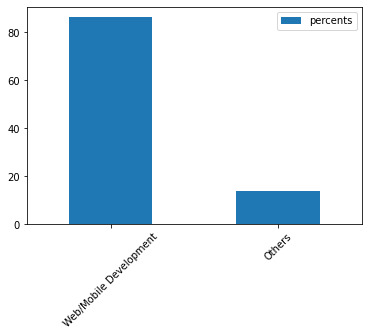

In [33]:
intdf.plot.bar()
plt.xticks([0,1],['Web/Mobile Development','Others'],rotation=45)
plt.show()

In [34]:
# Dropping all the roles where participant didn't answer what role they are interested in

survey = survey.dropna(subset=['JobRoleInterest'])

In [35]:
survey['JobRoleInterest'].isnull().sum()

0

In [36]:
survey['CountryLive'].value_counts(dropna=False,normalize=True)*100

United States of America         44.693936
India                             7.551487
United Kingdom                    4.505149
Canada                            3.718535
NaN                               2.202517
Poland                            1.873570
Brazil                            1.844966
Germany                           1.787757
Australia                         1.601831
Russia                            1.458810
Ukraine                           1.272883
Nigeria                           1.201373
Spain                             1.101259
France                            1.072654
Romania                           1.015446
Netherlands (Holland, Europe)     0.929634
Italy                             0.886728
Serbia                            0.743707
Philippines                       0.743707
Greece                            0.657895
Ireland                           0.614989
South Africa                      0.557780
Mexico                            0.529176
Turkey     

From the above frequency table, it is understood that about 45% of the participants are from USA, followed by 8% of participants from India, 4.5% from UK, and 3.7% from Canada

In [37]:
survey['CountryLive'].value_counts(dropna=False,normalize=False)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
NaN                               154
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand 

In [38]:
survey.shape

(6992, 136)

In [39]:
reprsample= survey.loc[(survey['JobRoleInterest'].str.lower().str.contains(r'web|mobile (?=develop)') == True),['CountryLive','MoneyForLearning','MonthsProgramming']].copy()
reprsample

,CountryLive,MoneyForLearning,MonthsProgramming
1,United States of America,80.0,6.0
2,United States of America,1000.0,5.0
3,Brazil,0.0,5.0
4,Portugal,0.0,24.0
6,United Kingdom,0.0,12.0
...,...,...,...
18157,Sweden,0.0,0.0
18161,Republic of Serbia,0.0,6.0
18163,United States of America,0.0,NaN
18171,Nigeria,10000.0,1.0


In [40]:
reprsample['MonthsProgramming'] = reprsample['MonthsProgramming'].replace({0:1})
reprsample['MoneyPerMonth'] = reprsample['MoneyForLearning']/reprsample['MonthsProgramming']
reprsample

,CountryLive,MoneyForLearning,MonthsProgramming,MoneyPerMonth
1,United States of America,80.0,6.0,13.333333
2,United States of America,1000.0,5.0,200.000000
3,Brazil,0.0,5.0,0.000000
4,Portugal,0.0,24.0,0.000000
6,United Kingdom,0.0,12.0,0.000000
...,...,...,...,...
18157,Sweden,0.0,1.0,0.000000
18161,Republic of Serbia,0.0,6.0,0.000000
18163,United States of America,0.0,NaN,NaN
18171,Nigeria,10000.0,1.0,10000.000000


In [41]:
reprsample.isnull().sum()

CountryLive          128
MoneyForLearning     432
MonthsProgramming    293
MoneyPerMonth        559
dtype: int64

In [42]:
reprsample= reprsample.dropna(subset=['MoneyPerMonth'])
reprsample

,CountryLive,MoneyForLearning,MonthsProgramming,MoneyPerMonth
1,United States of America,80.0,6.0,13.333333
2,United States of America,1000.0,5.0,200.000000
3,Brazil,0.0,5.0,0.000000
4,Portugal,0.0,24.0,0.000000
6,United Kingdom,0.0,12.0,0.000000
...,...,...,...,...
18155,Ukraine,0.0,3.0,0.000000
18156,India,1000.0,1.0,1000.000000
18157,Sweden,0.0,1.0,0.000000
18161,Republic of Serbia,0.0,6.0,0.000000


In [43]:
reprsample= reprsample.dropna(subset=['CountryLive'])
reprsample

,CountryLive,MoneyForLearning,MonthsProgramming,MoneyPerMonth
1,United States of America,80.0,6.0,13.333333
2,United States of America,1000.0,5.0,200.000000
3,Brazil,0.0,5.0,0.000000
4,Portugal,0.0,24.0,0.000000
6,United Kingdom,0.0,12.0,0.000000
...,...,...,...,...
18155,Ukraine,0.0,3.0,0.000000
18156,India,1000.0,1.0,1000.000000
18157,Sweden,0.0,1.0,0.000000
18161,Republic of Serbia,0.0,6.0,0.000000


In [44]:
reprsample['MoneyPerMonth'].describe()

count     5380.000000
mean       193.312448
std       1679.377154
min          0.000000
25%          0.000000
50%          1.428571
75%         33.333333
max      80000.000000
Name: MoneyPerMonth, dtype: float64

In [45]:
%matplotlib notebook

<IPython.core.display.Javascript object>


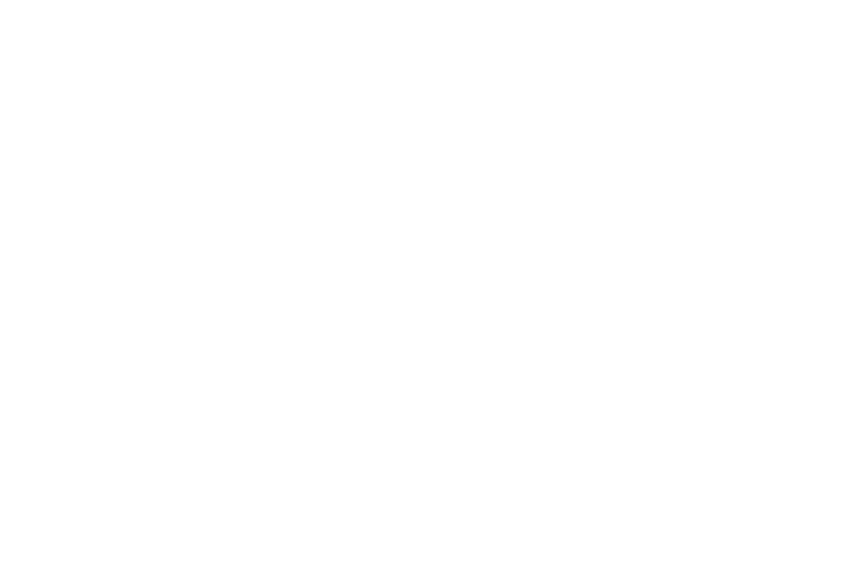

<IPython.core.display.Javascript object>


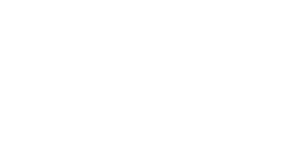

In [46]:
reprsample['MoneyPerMonth'].plot.box()
plt.show()

In [47]:
reprsample.groupby(by='CountryLive').mean()['MoneyPerMonth'].sort_values(ascending=False)

CountryLive
Yemen                            10000.000000
Puerto Rico                       5005.436508
Spain                              949.046664
Austria                            936.208333
Australia                          511.439759
Trinidad & Tobago                  500.000000
Taiwan                             473.226496
Chile                              375.000000
New Zealand                        364.813797
Norway                             352.806584
Luxembourg                         338.817664
Israel                             323.718434
Russia                             311.753803
Vietnam                            285.183333
Dominican Republic                 281.111111
Uganda                             276.620370
China                              255.914424
Bangladesh                         253.441993
Nigeria                            253.333491
United States of America           249.329094
Niger                              239.303571
Nicaragua             